****
# Note #
**This Notebook will only consist of data preprocessing,feature selection and Model building**
****

In [92]:
import pandas as pd
import numpy as np

****
# Reading and Displaying data #
****

In [93]:
df=pd.read_csv(r"C:\Users\Samanyu K\Downloads\diabetes.csv")
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


**Column Definitions:**

**1.Pregnancies:** Number of times pregnant

**2.Glucose:** Plasma glucose concentration a 2 hours in an oral glucose tolerance test

**3.BloodPressure:** Diastolic blood pressure (mm Hg)

**4.SkinThickness:** Triceps skin fold thickness (mm)

**5.Insulin:** 2-Hour serum insulin (mu U/ml)

**6.BMI:** Body mass index (weight in kg/(height in m)^2)

**7.DiabetesPedigreeFunction:** Diabetes pedigree function

**8.Age:** Age (years)

**9.Outcome:** Class variable (0 or 1)

****
# Data Preprocessing #
****

In [94]:
# importing
import seaborn as sns
import matplotlib.pyplot as plt

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [96]:
# checking for null values
df.isnull().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

In [97]:
# No null values
# Cheking for duplicates

df.duplicated().sum()

0

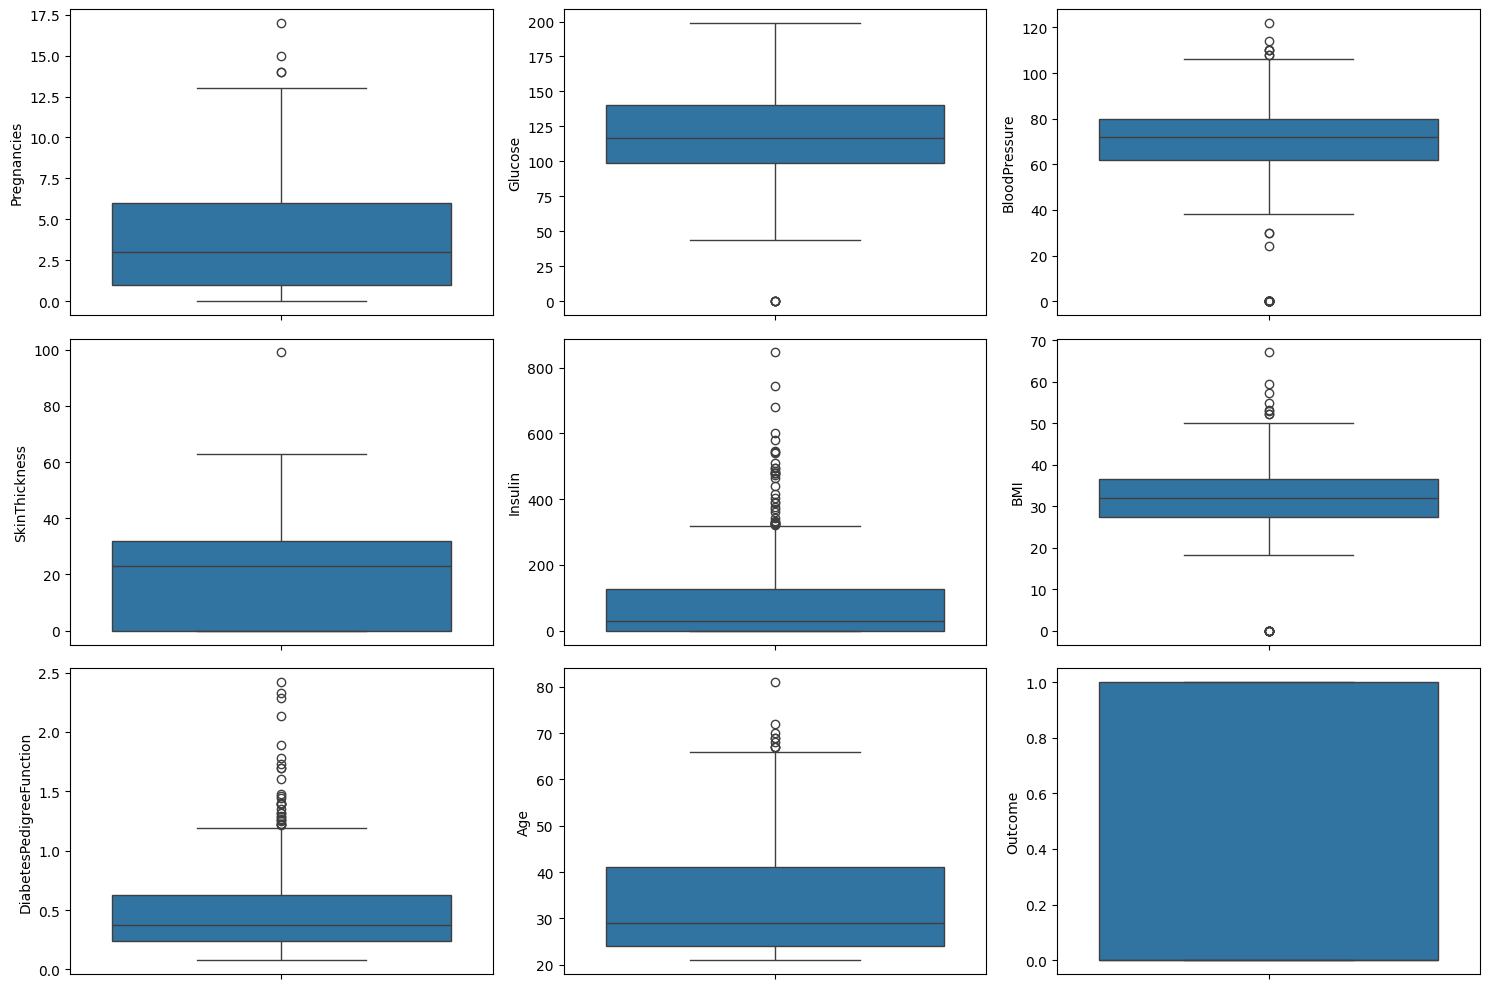

In [98]:
# No duplicates :)
# The data is in the desired format and there are no duplicates nor missing values
# Outliers

fig, axes = plt.subplots(3, 3, figsize=(15, 10))
for i, col in enumerate(df.columns):
    row, col_position = divmod(i, 3)
    sns.boxplot(data=df, y=col, ax=axes[row, col_position])
    plt.tight_layout()
plt.show()

In [99]:
# Removing outliers

def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

for col in df.columns:
    df=remove_outliers(df,col)

****
# Feature Engineering #
****

In [100]:
# importing
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import mutual_info_classif
from sklearn.preprocessing import LabelEncoder

In [101]:
# Lets calculate mutual information then move on to visualize correlation and mutual information

tdf=df.copy()  
x=tdf.drop(columns='Outcome')
y=tdf['Outcome']
mi=mutual_info_classif(x,y)
mi_df=pd.DataFrame({'Feature':x.columns,'Mutual Information':mi})
mi_df=mi_df.sort_values(by='Mutual Information', ascending=False).reset_index(drop=True)

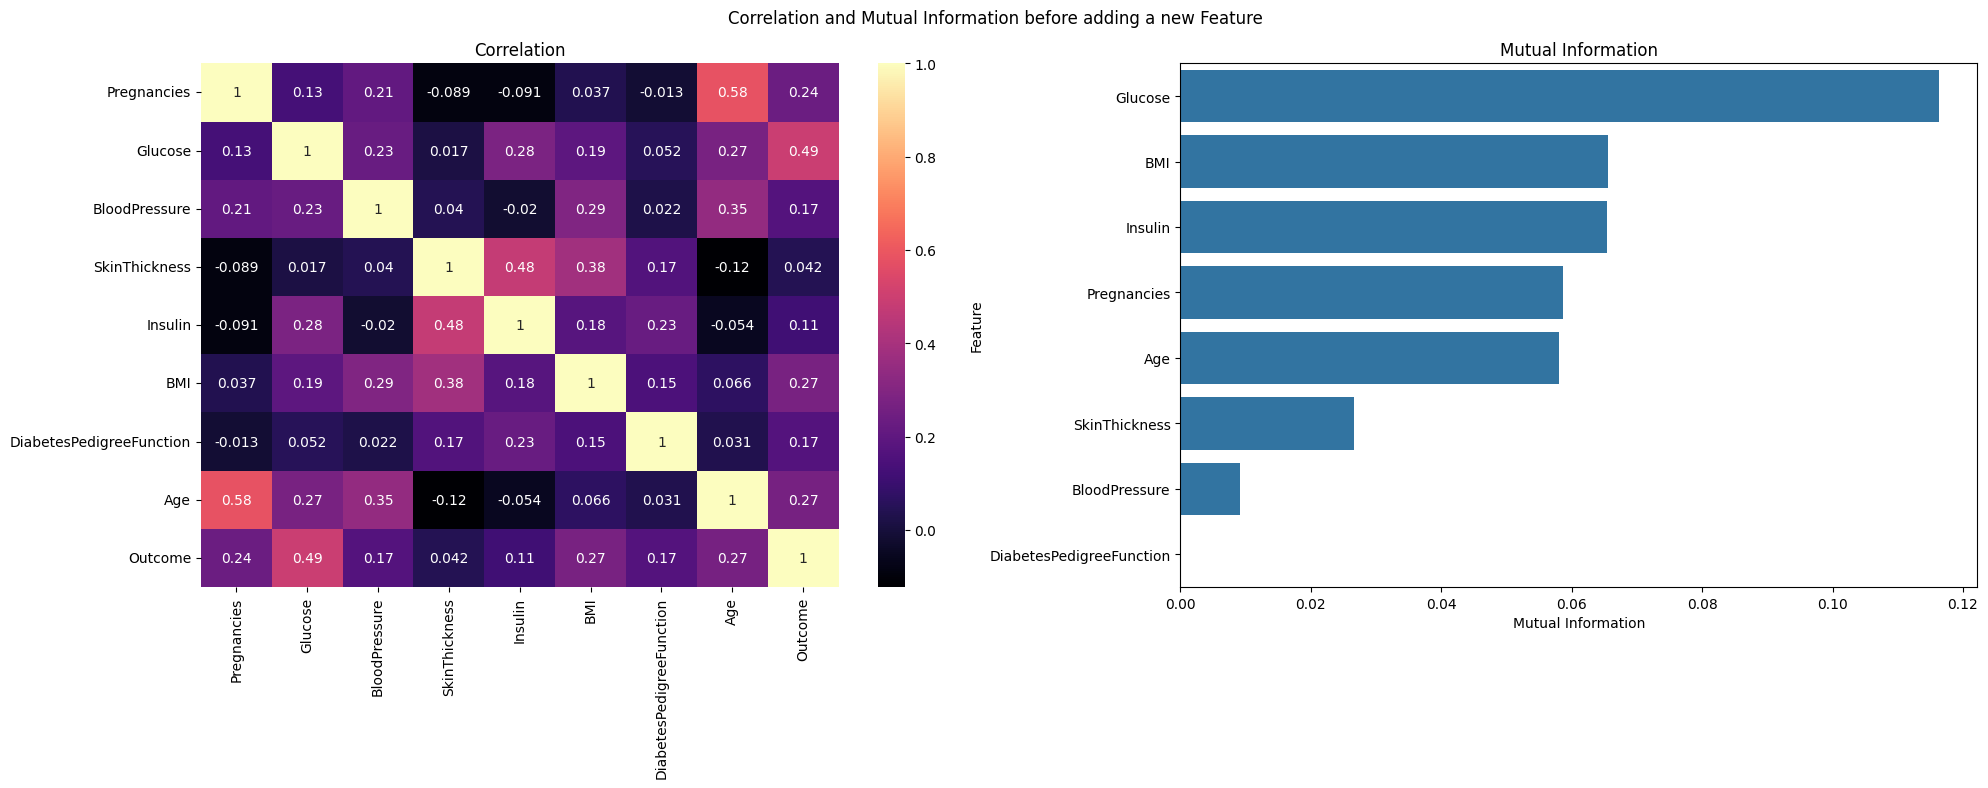

In [102]:
fig,ax=plt.subplots(1,2,figsize=(20,8))
sns.heatmap(df.corr(),annot=True,cmap='magma',ax=ax[0])
ax[0].set_title('Correlation')
sns.barplot(x='Mutual Information',y='Feature', data=mi_df,ax=ax[1])
ax[1].set_title('Mutual Information')
plt.suptitle('Correlation and Mutual Information before adding a new Feature')
plt.tight_layout()
plt.show()

**Ideas for creating new features:**

1. Interaction Features (Multiplying features)
2. Polynomial Features (Helps build non linear relationships)
3. Age Binning
4. Log Transformations (For large values)
5. Ratios
6. Creating categorical features from continuous features
7. We can combine features and create a Health indicator feature that tells how bad ones health is

**and so on....**

In [103]:
# let us create some new features- (Age Binning)

max=df['Age'].max()
min=df['Age'].min()
print(min,max)

21 65


In [104]:
bins=[20,36,51,66,float('inf')]  # Define bin edges
labels=['Young Adults','Middle-Aged Adults','Older Adults','Seniors']  # Define labels
df['Age_Category']=pd.cut(df['Age'],bins=bins,labels=labels, right=True)

le=LabelEncoder()
df['Age_Category']=le.fit_transform(df['Age_Category']) # Encoding categorical column
df['Normalized_Age'] = (df['Age'] - df['Age'].min()) / (df['Age'].max() - df['Age'].min())

In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 636 entries, 0 to 767
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               636 non-null    int64  
 1   Glucose                   636 non-null    int64  
 2   BloodPressure             636 non-null    int64  
 3   SkinThickness             636 non-null    int64  
 4   Insulin                   636 non-null    int64  
 5   BMI                       636 non-null    float64
 6   DiabetesPedigreeFunction  636 non-null    float64
 7   Age                       636 non-null    int64  
 8   Outcome                   636 non-null    int64  
 9   Age_Category              636 non-null    int32  
 10  Normalized_Age            636 non-null    float64
dtypes: float64(3), int32(1), int64(7)
memory usage: 57.1 KB


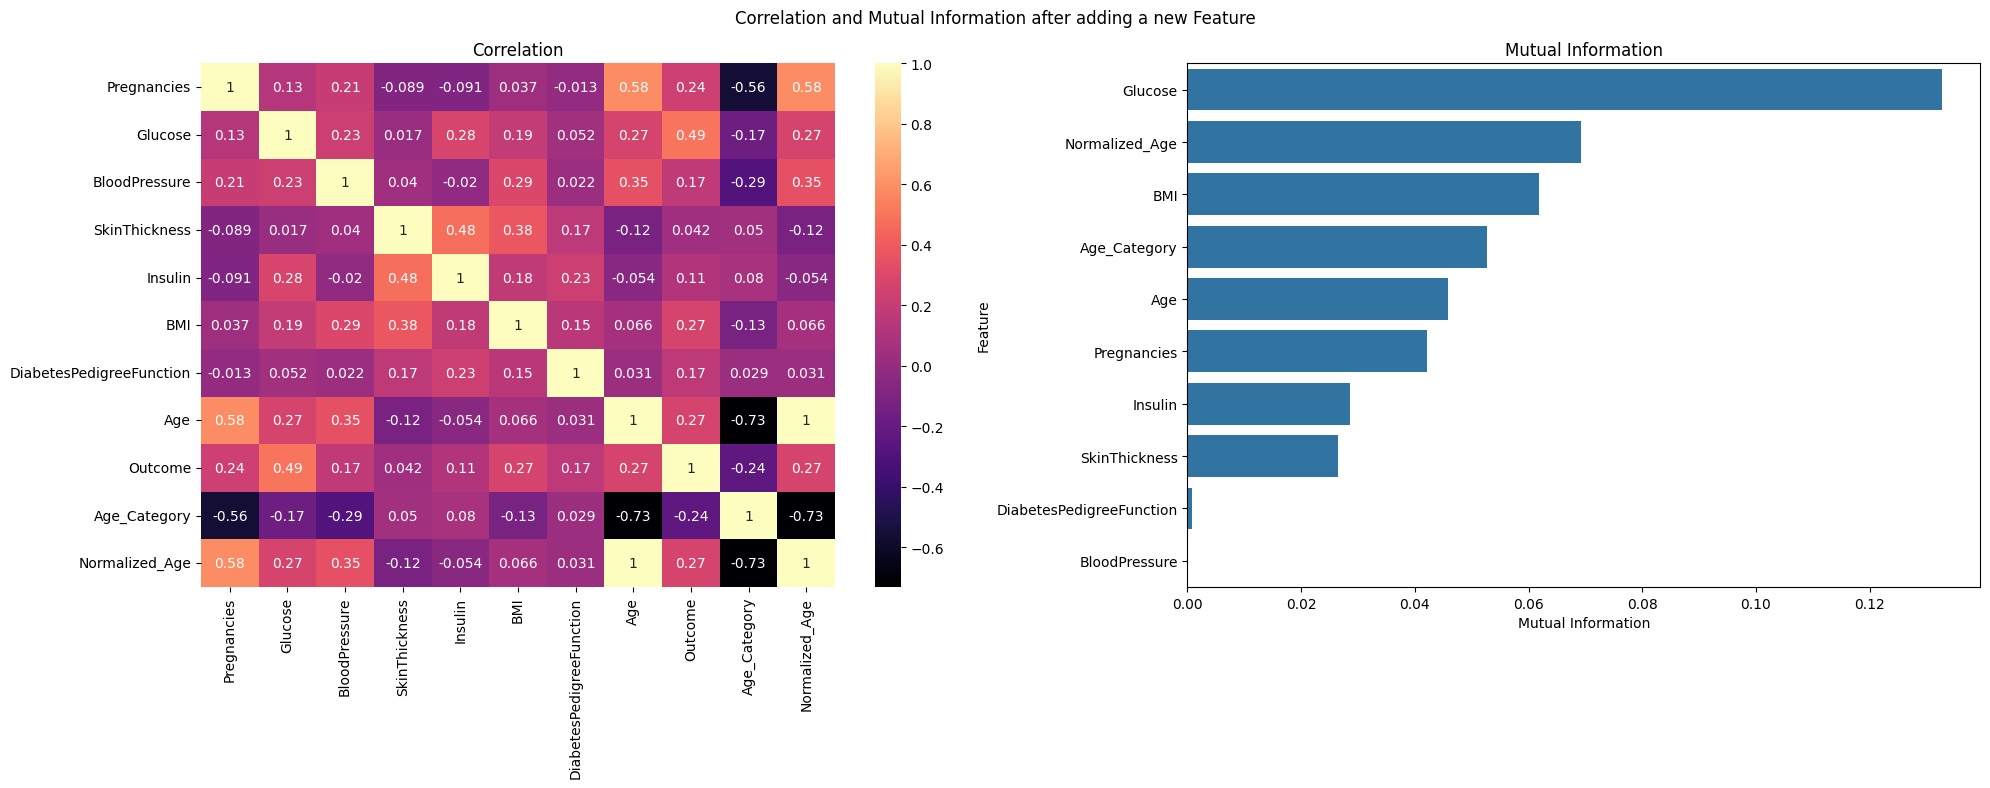

In [106]:
tdf=df.copy()  
x=tdf.drop(columns='Outcome')
y=tdf['Outcome']
mi=mutual_info_classif(x,y)
mi_df=pd.DataFrame({'Feature':x.columns,'Mutual Information':mi})
mi_df=mi_df.sort_values(by='Mutual Information', ascending=False).reset_index(drop=True)

fig,ax=plt.subplots(1,2,figsize=(20,8))
sns.heatmap(df.corr(),annot=True,cmap='magma',ax=ax[0])
ax[0].set_title('Correlation')
sns.barplot(x='Mutual Information',y='Feature', data=mi_df,ax=ax[1])
ax[1].set_title('Mutual Information')
plt.suptitle('Correlation and Mutual Information after adding a new Feature')
plt.tight_layout()
plt.show()

****
# Data Preparation #
****

In [107]:
#importing
from sklearn.model_selection import train_test_split

In [108]:
x=df.drop(columns='Outcome')
y=df['Outcome']

In [109]:
x_t,x_te,y_t,y_te=train_test_split(x,y,test_size=0.25,random_state=20) # Splitting the dataset into training set (75%) and testing set (25%).

****
# Models #
****

In [110]:
#importing
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,classification_report,confusion_matrix
from sklearn.model_selection import RandomizedSearchCV

In [111]:
cr=[] #Storing classification reports
cm_t=[] # Storing Confusion matrix for Training set
cm=[] # Storing Confusion matrix for Testing set
acc_t=[] # Storing accuracy score for Training set
acc=[] # Storing accuracy score for testing set
p_t=[] # Storing precison score for Training set
p=[] # Storing precison score for Testing set
r_t=[] # Storing recall score for Training set
r=[] # Storing recall score for Testing set
f1_t=[] # Storing f1 score for Training set
f1=[] # Storing f1 score for Testing set

## Logistic Regression ##

In [112]:
reg=LogisticRegression(class_weight ='balanced')
params={'penalty':['l1','l2'],'solver':['saga','liblinear'],'C':list(np.arange(1,21))}
nreg=RandomizedSearchCV(reg,param_distributions=params,scoring='accuracy',n_jobs=-1,cv=10,random_state=42)
nreg.fit(x_t,y_t)
print(nreg.best_params_)
print(nreg.best_score_)

{'solver': 'liblinear', 'penalty': 'l2', 'C': 8}
0.7503989361702128


In [113]:
nreg=nreg.best_estimator_
predt1=nreg.predict(x_t)
pred1=nreg.predict(x_te)

In [114]:
cr.append(classification_report(y_te,pred1))
cm_t.append(confusion_matrix(y_t,predt1))
cm.append(confusion_matrix(y_te,pred1))
acc_t.append(accuracy_score(y_t,predt1))
acc.append(accuracy_score(y_te,pred1))
p_t.append(precision_score(y_t,predt1))
p.append(precision_score(y_te,pred1))
r_t.append(recall_score(y_t,predt1))
r.append(recall_score(y_te,pred1))
f1_t.append(f1_score(y_t,predt1))
f1.append(f1_score(y_te,pred1))

## K Nearest Neighbors ##

In [115]:
knn=KNeighborsClassifier()
params={'n_neighbors':list(np.arange(2,50))}
nknn=RandomizedSearchCV(knn,param_distributions=params,scoring='accuracy',n_jobs=-1,cv=10,random_state=42)
nknn.fit(x_t,y_t)
print(nknn.best_params_)
print(nknn.best_score_)

{'n_neighbors': 28}
0.7796985815602836


In [116]:
nknn=nknn.best_estimator_
predt2=nknn.predict(x_t)
pred2=nknn.predict(x_te)

In [117]:
cr.append(classification_report(y_te,pred2))
cm_t.append(confusion_matrix(y_t,predt2))
cm.append(confusion_matrix(y_te,pred2))
acc_t.append(accuracy_score(y_t,predt2))
acc.append(accuracy_score(y_te,pred2))
p_t.append(precision_score(y_t,predt2))
p.append(precision_score(y_te,pred2))
r_t.append(recall_score(y_t,predt2))
r.append(recall_score(y_te,pred2))
f1_t.append(f1_score(y_t,predt2))
f1.append(f1_score(y_te,pred2))

## Decision Tree ##

In [118]:
dt=DecisionTreeClassifier(class_weight ='balanced')
path=dt.cost_complexity_pruning_path(x_t,y_t)
alphas=path.ccp_alphas
params={'ccp_alpha':alphas}
ndt=RandomizedSearchCV(dt,param_distributions=params,cv=10,n_jobs=-1,scoring='accuracy',n_iter=5)
ndt.fit(x_t,y_t)
print(ndt.best_params_)
print(ndt.best_score_)
best_alpha=ndt.best_params_['ccp_alpha']

{'ccp_alpha': 1.6754890158214925e-16}
0.7484485815602836


In [119]:
dt=DecisionTreeClassifier(ccp_alpha=best_alpha)
params={'criterion':['gini','entropy'],'min_samples_split':list(np.arange(2,51)),'min_samples_leaf':list(np.arange(2,51))}
ndt=RandomizedSearchCV(dt,param_distributions=params,cv=10,n_jobs=-1,scoring='accuracy')
ndt.fit(x_t,y_t)
print(ndt.best_params_)
print(ndt.best_score_)

{'min_samples_split': 28, 'min_samples_leaf': 41, 'criterion': 'gini'}
0.7921099290780141


In [120]:
ndt=ndt.best_estimator_
predt3=ndt.predict(x_t)
pred3=ndt.predict(x_te)

In [121]:
cr.append(classification_report(y_te,pred3))
cm_t.append(confusion_matrix(y_t,predt3))
cm.append(confusion_matrix(y_te,pred3))
acc_t.append(accuracy_score(y_t,predt3))
acc.append(accuracy_score(y_te,pred3))
p_t.append(precision_score(y_t,predt3))
p.append(precision_score(y_te,pred3))
r_t.append(recall_score(y_t,predt3))
r.append(recall_score(y_te,pred3))
f1_t.append(f1_score(y_t,predt3))
f1.append(f1_score(y_te,pred3))

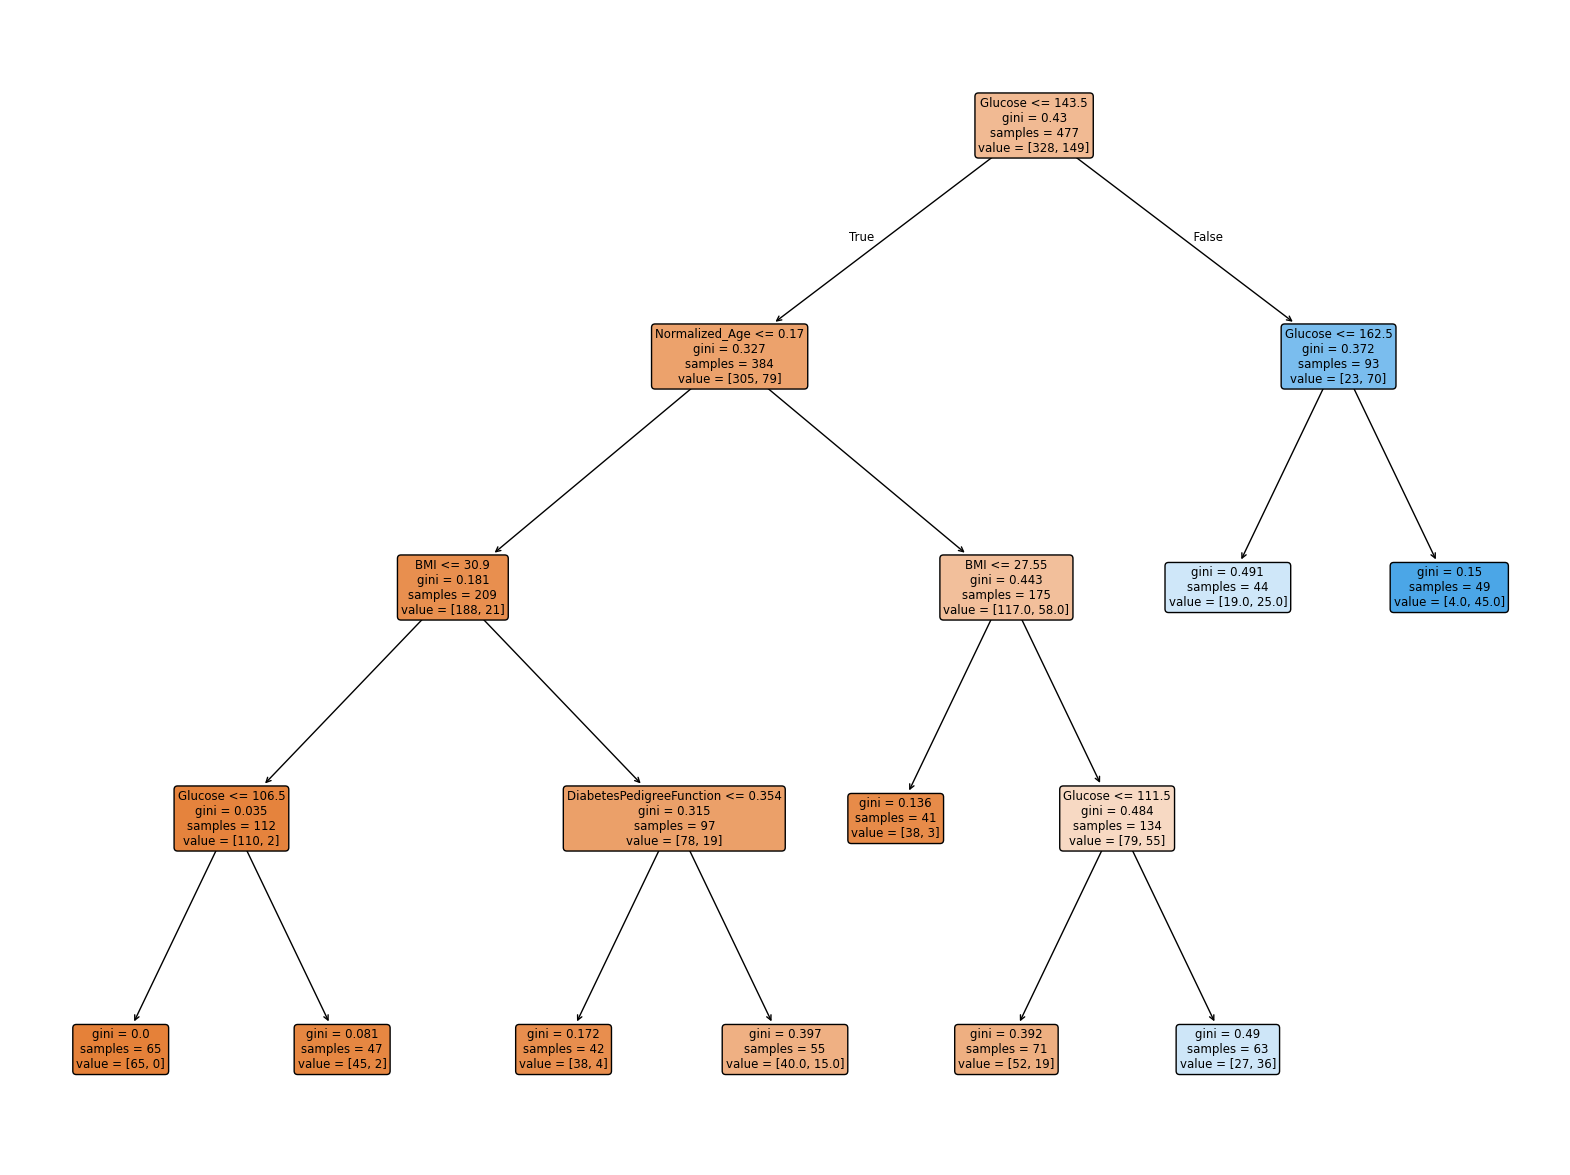

In [122]:
plt.figure(figsize=(20, 15))
plot_tree(ndt,filled=True,feature_names=x_t.columns,rounded=True)
plt.show()

## Random Forest ##

In [123]:
rf=RandomForestClassifier(class_weight ='balanced')
params={'criterion':['gini','entropy'],'min_samples_split':list(np.arange(2,51)),'min_samples_leaf':list(np.arange(2,51)),
        'max_features':['sqrt','log2',None],
       'n_estimators':[1000]}
nrf=RandomizedSearchCV(rf,param_distributions=params,cv=10,n_jobs=-1,scoring='accuracy')
nrf.fit(x_t,y_t)
print(nrf.best_params_)
print(nrf.best_score_)

{'n_estimators': 1000, 'min_samples_split': 26, 'min_samples_leaf': 7, 'max_features': 'log2', 'criterion': 'gini'}
0.781781914893617


In [124]:
nrf=nrf.best_estimator_
predt4=nrf.predict(x_t)
pred4=nrf.predict(x_te)

In [125]:
cr.append(classification_report(y_te,pred4))
cm_t.append(confusion_matrix(y_t,predt4))
cm.append(confusion_matrix(y_te,pred4))
acc_t.append(accuracy_score(y_t,predt4))
acc.append(accuracy_score(y_te,pred4))
p_t.append(precision_score(y_t,predt4))
p.append(precision_score(y_te,pred4))
r_t.append(recall_score(y_t,predt4))
r.append(recall_score(y_te,pred4))
f1_t.append(f1_score(y_t,predt4))
f1.append(f1_score(y_te,pred4))

## AdaBoost ##

In [126]:
ada=AdaBoostClassifier(algorithm='SAMME')
params={
    'n_estimators': [1000],
    'learning_rate': np.arange(0.01, 2.01, 0.01)}

nada=RandomizedSearchCV(ada,param_distributions=params,cv=10,n_jobs=-1,scoring='accuracy')
nada.fit(x_t ,y_t)
print(nada.best_params_)
print(nada.best_score_)

{'n_estimators': 1000, 'learning_rate': 0.26}
0.7925531914893618


In [127]:
nada=nada.best_estimator_
predt5=nada.predict(x_t)
pred5=nada.predict(x_te)

In [128]:
cr.append(classification_report(y_te,pred5))
cm_t.append(confusion_matrix(y_t,predt5))
cm.append(confusion_matrix(y_te,pred5))
acc_t.append(accuracy_score(y_t,predt5))
acc.append(accuracy_score(y_te,pred5))
p_t.append(precision_score(y_t,predt5))
p.append(precision_score(y_te,pred5))
r_t.append(recall_score(y_t,predt5))
r.append(recall_score(y_te,pred5))
f1_t.append(f1_score(y_t,predt5))
f1.append(f1_score(y_te,pred5))

## Gradient Boost ##

In [129]:
gb=GradientBoostingClassifier()
params={'n_estimators': [2000], 'learning_rate': np.arange(0.01, 2.01, 0.01),'min_samples_split':list(np.arange(2,51)),
        'min_samples_leaf':list(np.arange(2,51)),'subsample': [0.5, 0.8, 1.0],'max_features':['sqrt','log2',None]}
ngb=RandomizedSearchCV(gb,param_distributions=params,cv=10,n_jobs=-1,scoring='accuracy')
ngb.fit(x_t ,y_t)
print(ngb.best_params_)
print(ngb.best_score_)

{'subsample': 0.5, 'n_estimators': 2000, 'min_samples_split': 43, 'min_samples_leaf': 38, 'max_features': 'log2', 'learning_rate': 0.29000000000000004}
0.750531914893617


In [130]:
ngb=ngb.best_estimator_
predt6=nada.predict(x_t)
pred6=nada.predict(x_te)

In [131]:
cr.append(classification_report(y_te,pred6))
cm_t.append(confusion_matrix(y_t,predt6))
cm.append(confusion_matrix(y_te,pred6))
acc_t.append(accuracy_score(y_t,predt6))
acc.append(accuracy_score(y_te,pred6))
p_t.append(precision_score(y_t,predt6))
p.append(precision_score(y_te,pred6))
r_t.append(recall_score(y_t,predt6))
r.append(recall_score(y_te,pred6))
f1_t.append(f1_score(y_t,predt6))
f1.append(f1_score(y_te,pred6))

****
# Model Evaluation Metrics #
****

In [132]:
models=['Logistic Regression','KNN','Decision Tree','Random Forest','Adaboost','Gradient Boost']
for model, report in zip(models, cr):
    print(f"Classification Report for {model}:\n{report}\n")

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.86      0.71      0.78       111
           1       0.52      0.73      0.61        48

    accuracy                           0.72       159
   macro avg       0.69      0.72      0.69       159
weighted avg       0.76      0.72      0.73       159


Classification Report for KNN:
              precision    recall  f1-score   support

           0       0.75      0.88      0.81       111
           1       0.55      0.33      0.42        48

    accuracy                           0.72       159
   macro avg       0.65      0.61      0.61       159
weighted avg       0.69      0.72      0.69       159


Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       0.83      0.78      0.81       111
           1       0.56      0.62      0.59        48

    accuracy                           0.74       159
   macr

**Training Metrics**

In [133]:
m_t=pd.DataFrame({'Classification Algorithms':models,'Training Accuracy':acc_t,'Training Precision':p_t,
                  'Training Recall':r_t,'Training F1 Score':f1_t})
m_t.sort_values(by=['Training Accuracy','Training Precision','Training Recall','Training F1 Score'],ascending=False).reset_index(drop=True)

,Classification Algorithms,Training Accuracy,Training Precision,Training Recall,Training F1 Score
0,Random Forest,0.842767,0.705556,0.852349,0.772036
1,Adaboost,0.811321,0.792079,0.536913,0.640000
2,Gradient Boost,0.811321,0.792079,0.536913,0.640000
3,Decision Tree,0.805031,0.679487,0.711409,0.695082
4,KNN,0.794549,0.822785,0.436242,0.570175
5,Logistic Regression,0.765199,0.602210,0.731544,0.660606


**Testing Metrics**

In [134]:
m_te=pd.DataFrame({'Classification Algorithms':models,'Testing Accuracy':acc,'Testing Precision':p,
                  'Testing Recall':r,'Testing F1 Score':f1})
m_te.sort_values(by=['Testing Accuracy','Testing Precision','Testing Recall','Testing F1 Score'],ascending=False).reset_index(drop=True)

,Classification Algorithms,Testing Accuracy,Testing Precision,Testing Recall,Testing F1 Score
0,Adaboost,0.798742,0.700000,0.583333,0.636364
1,Gradient Boost,0.798742,0.700000,0.583333,0.636364
2,Random Forest,0.748428,0.562500,0.750000,0.642857
3,Decision Tree,0.735849,0.555556,0.625000,0.588235
4,KNN,0.716981,0.551724,0.333333,0.415584
5,Logistic Regression,0.716981,0.522388,0.729167,0.608696


**Confusion Matrices for Training Set**

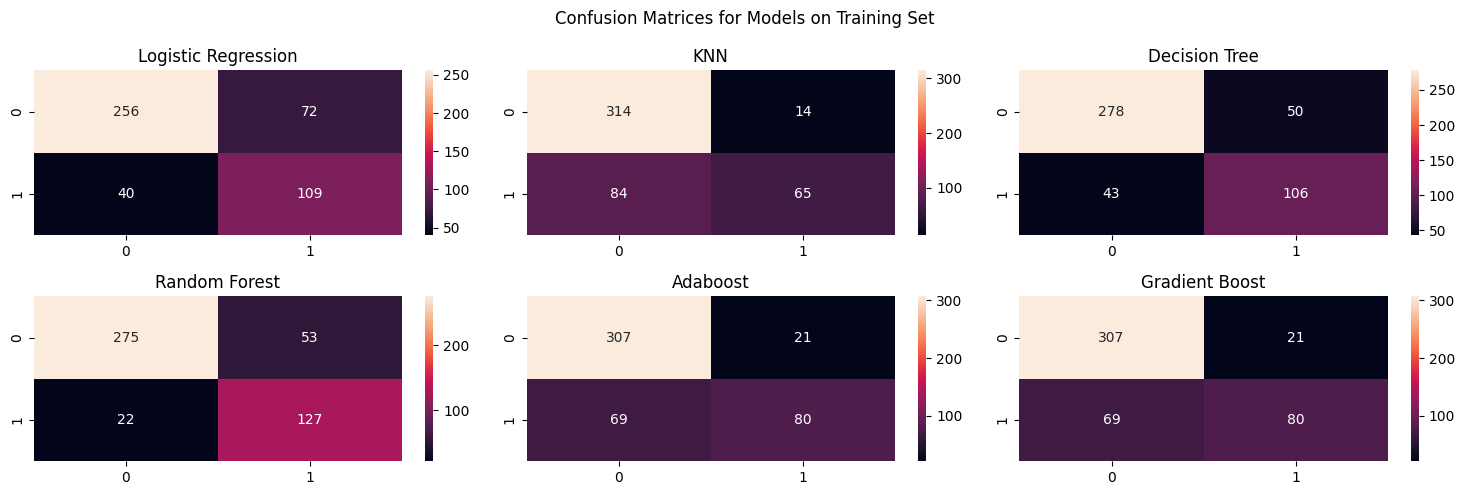

In [135]:
fig,ax=plt.subplots(2,3,figsize=(15,5))
r=0
c=0
for i,mod in enumerate(models):
    sns.heatmap(cm_t[i],annot=True,fmt='d',ax=ax[r][c])
    ax[r][c].set_title(mod)
    c+=1
    if(c==3):
        r+=1
        c=0
plt.suptitle('Confusion Matrices for Models on Training Set')
plt.tight_layout()
plt.show()

**Confusion Matrices for Testing Set**

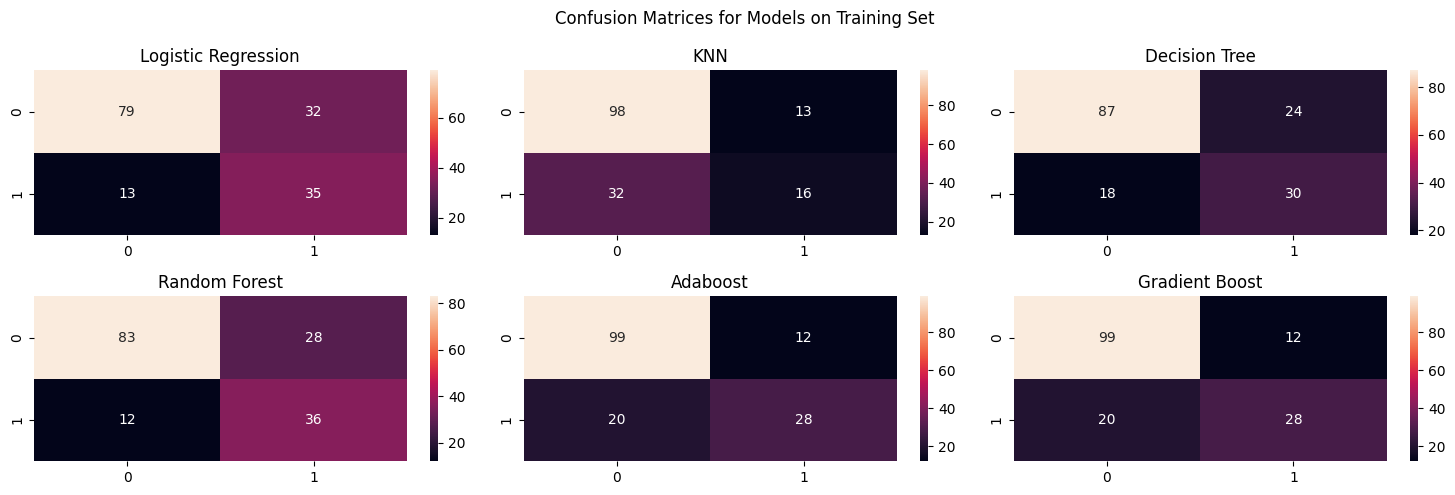

In [136]:
fig,ax=plt.subplots(2,3,figsize=(15,5))
r=0
c=0
for i,mod in enumerate(models):
    sns.heatmap(cm[i],annot=True,fmt='d',ax=ax[r][c])
    ax[r][c].set_title(mod)
    c+=1
    if(c==3):
        r+=1
        c=0
plt.suptitle('Confusion Matrices for Models on Training Set')
plt.tight_layout()
plt.show()

****
# Conclusion #
****